In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
m_stroke_df = pd.read_csv("train_2v.csv")

In [3]:
m_stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
m_stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


**Lets check null values**

Text(0.5, 1.0, 'Missing values')

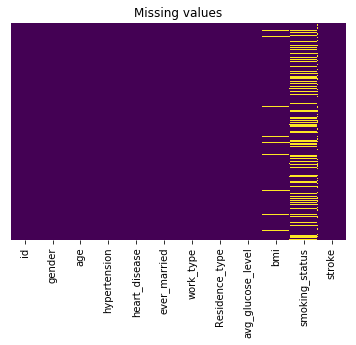

In [5]:
sns.heatmap(m_stroke_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Missing values")

**here we can see the missing values in columns (bmi,smoking_status). To do any further analysis we should handeled these missing values**

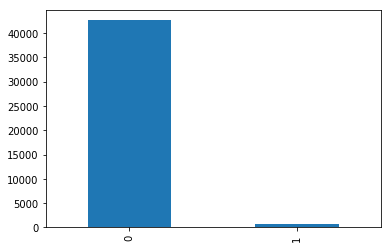

In [6]:
m_stroke_df['stroke'].value_counts().plot(kind='bar')

**It seems our dependent variable has imbalanced data. We will take care this when we start building model.**

# Feature Exploration

In [7]:
s_stroke_df = pd.DataFrame()
s_stroke_df = m_stroke_df

**Feature : gender**

**Description : Male / Female** 

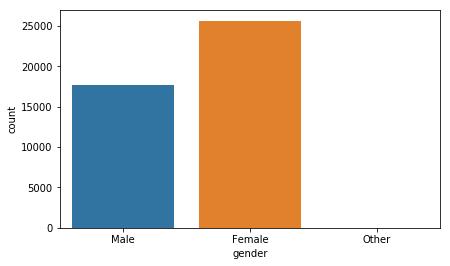

In [30]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(x='gender',data=s_stroke_df)


In [9]:
s_stroke_df['gender'].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

**Feature : age**

**Description : Age of samples** 

Text(0, 0.5, 'Probability Density')

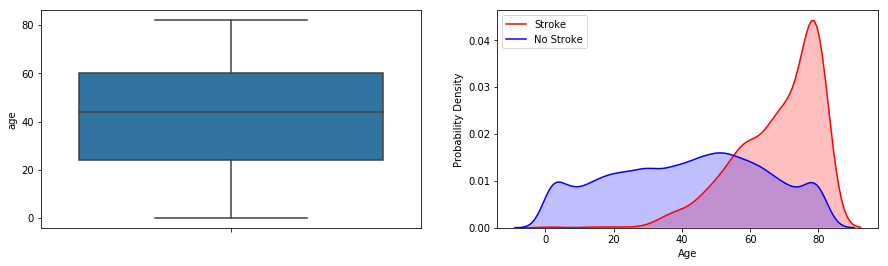

In [33]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(y='age', data=s_stroke_df)
plt.subplot(1,2,2)
sns.kdeplot(s_stroke_df.loc[(s_stroke_df['stroke']==1), 
            'age'], color='r', shade=True, Label='Stroke') 
  
sns.kdeplot(s_stroke_df.loc[(s_stroke_df['stroke']==0),  
            'age'], color='b', shade=True, Label='No Stroke') 
  
plt.xlabel('Age') 
plt.ylabel('Probability Density') 

**Feature: hypertension**
    

**Description :  Is user has hypertension**

Text(0, 0.5, 'Probability Density')

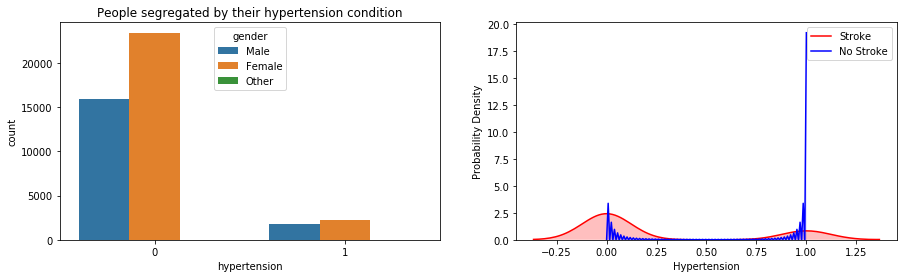

In [35]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data=s_stroke_df, x='hypertension',hue='gender')
plt.title("People segregated by their hypertension condition")

plt.subplot(1,2,2)
sns.kdeplot(s_stroke_df.loc[(s_stroke_df['stroke']==1), 
            'hypertension'], color='r', shade=True, Label='Stroke') 
  
sns.kdeplot(s_stroke_df.loc[(s_stroke_df['stroke']==0),  
            'hypertension'], color='b', shade=True, Label='No Stroke') 
  
plt.xlabel('Hypertension') 
plt.ylabel('Probability Density') 

**Feature : heart_disease**

**Description : People with heart disease**

Text(0, 0.5, 'Probability Density')

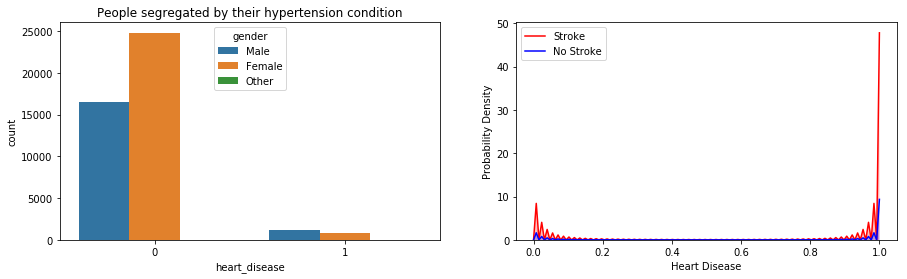

In [38]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data=s_stroke_df, x='heart_disease',hue='gender')
plt.title("People segregated by their hypertension condition")
plt.subplot(1,2,2)
sns.kdeplot(s_stroke_df.loc[(s_stroke_df['stroke']==1), 
            'heart_disease'], color='r', shade=True, Label='Stroke') 
  
sns.kdeplot(s_stroke_df.loc[(s_stroke_df['stroke']==0),  
            'heart_disease'], color='b', shade=True, Label='No Stroke') 
  
plt.xlabel('Heart Disease') 
plt.ylabel('Probability Density') 

**Feature : ever_married**

**Description : Maritial Status**

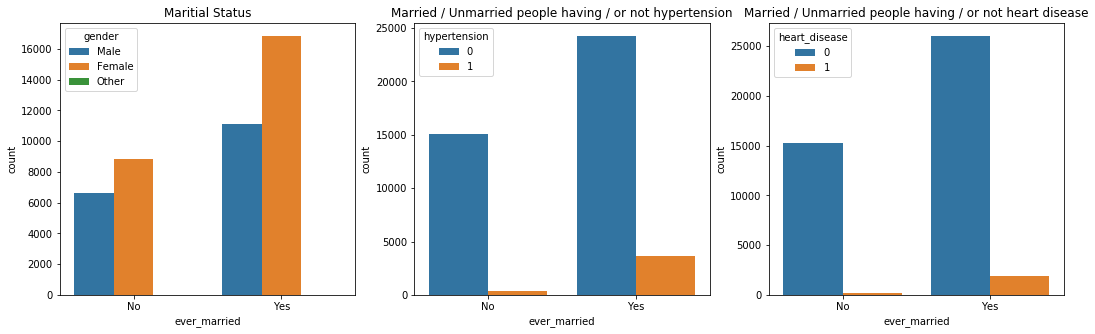

In [13]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.countplot(data=s_stroke_df,x='ever_married', hue='gender')
plt.title('Maritial Status')
plt.subplot(1,3,2)
plt.title('Married / Unmarried people having / or not hypertension')
sns.countplot(data=s_stroke_df,x='ever_married', hue='hypertension')
plt.subplot(1,3,3)
plt.title('Married / Unmarried people having / or not heart disease')
sns.countplot(data=s_stroke_df,x='ever_married', hue='heart_disease')
plt.show()


**Feature : work_type**

**Description : Work people do for living**

Text(0.5, 1.0, '')

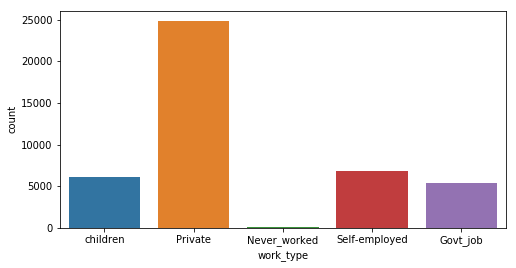

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(data=s_stroke_df,x='work_type')
plt.title('')

**Feature : Residence_type**

**Description : Area of living**

Text(0.5, 1.0, '')

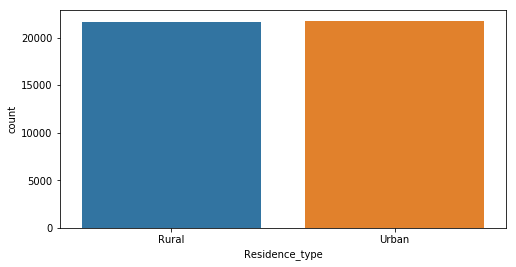

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(data=s_stroke_df,x='Residence_type')
plt.title('')

**Feature : avg_glucose_level**

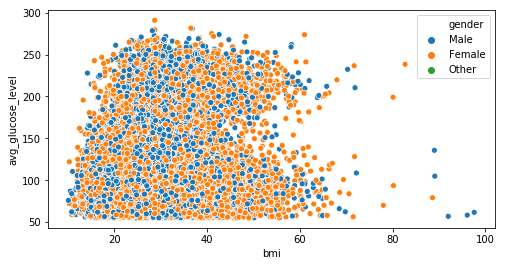

In [23]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=s_stroke_df,x='bmi',y='avg_glucose_level',hue='gender')

**Feature : bmi**

In [17]:
male_mean = s_stroke_df[s_stroke_df.gender=='Male']['bmi'].mean()
female_mean = s_stroke_df[s_stroke_df.gender=='Female']['bmi'].mean()
male_mean,female_mean


(28.398451666077907, 28.745908999799436)

In [18]:
def fill_bmi(col):
    gender = col[0]
    bmi = col[1]
    if pd.isnull(bmi):
        if gender=='Male':
            return male_mean
        else:
            return female_mean
    else:
        return bmi
    

In [19]:
s_stroke_df['bmi'] = s_stroke_df[['gender','bmi']].apply(fill_bmi,axis=1)

**Feature : smoking_status**

In [24]:
s_stroke_df['smoking_status'].isnull().sum()

13292

In [26]:
s_stroke_df['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64